In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
from torchvision.utils import make_grid
from torchvision.io import read_image
from torchvision import transforms

In [14]:
path = '../../images/poses/'
imgs_1 = sorted(glob.glob(path + '*.png'))
path = '../../images/reconstructed_poses/reconstructed/'
imgs_2 = sorted(glob.glob(path + '*.png'))

In [18]:
imgs = imgs_1[-5:] + imgs_2[-5:]

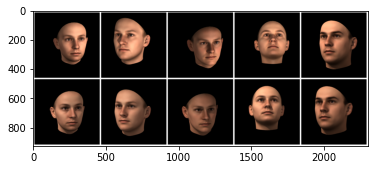

In [19]:
imgs = [read_image(i) for i in imgs]
grid = make_grid(imgs, nrow=5, padding=10, pad_value=255.)
ndarr = grid.permute(1, 2, 0).cpu().numpy()
plt.imshow(ndarr)

In [20]:
im = Image.fromarray(ndarr)
im.save(f'reco_3dmm.png')

In [22]:
i = [1, 7, 27, 31, 32]

In [24]:
path = '../../images/test_poses_contrast_npc40_for_reconstruction/'
imgs_1 = sorted(glob.glob(path + '*.png'))
imgs_1 = [imgs_1[x] for x in i]
path = '../../images/test_poses_contrast_npc40_reco_from_regress/test_poses_contrast_npc40_for_reconstruction/reconstructed/'
imgs_2 = sorted(glob.glob(path + '*.png'))
imgs_2 = [imgs_2[x] for x in i]

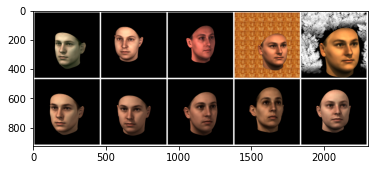

In [27]:
imgs = imgs_1 + imgs_2
imgs = [read_image(i) for i in imgs]
grid = make_grid(imgs, nrow=5, padding=10, pad_value=255.)
ndarr = grid.permute(1, 2, 0).cpu().numpy()
plt.imshow(ndarr)

In [28]:
im = Image.fromarray(ndarr)
im.save(f'reco_3dmm_background.png')

In [11]:
path = '../../images/celeb/'
imgs_1 = sorted(glob.glob(path + '*.png'))
path = '../../images/reconstructed_celeb/reconstructed/'
imgs_2 = sorted(glob.glob(path + '*.png'))

In [28]:
def read_image(path):
    img = Image.open(path).convert('RGB').resize((224, 224), Image.ANTIALIAS)
    return transforms.ToTensor()(img)

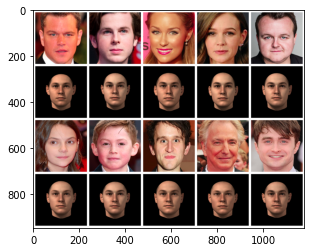

In [29]:
imgs = imgs_1[:5] + imgs_2[:5] + imgs_1[5:] + imgs_2[5:]
imgs = [read_image(i) for i in imgs]
grid = make_grid(imgs, nrow=5, padding=10, pad_value=1)
ndarr = grid.mul(255).clamp(0, 255).byte().permute(1, 2, 0).cpu().numpy()
plt.imshow(ndarr)

In [30]:
im = Image.fromarray(ndarr)
im.save(f'reco_celeb_small.png')